In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
import torch
from torch import nn

Using TensorFlow backend.
/Users/sfalk/miniconda3/envs/pytorch_p37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sfalk/miniconda3/envs/pytorch_p37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sfalk/miniconda3/envs/pytorch_p37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

In [393]:
import pandas as pd

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [407]:
import matplotlib.pylab as plt

In [467]:
from sklearn.model_selection import train_test_split


# Deep Learning in Medicine - Spring 2020
### BMSC-GA 4493, BMIN-GA 3007 
### Homework 2



**Note:** If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex 

See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

**Submission instruction**: Upload and Submit your final jupyter notebook with necessary files in <a href='http://newclasses.nyu.edu'>newclasses.nyu.edu</a>. If you use code or script from web, please give a link to the code in your answers. Not providing the reference of the code used will reduce your points!!

**Submission deadline: Friday March 24th 2019 (5:00 PM) --> No Extensions!!**

# Question 1: Convolutional Layer  (Total 20 points)

We have a 3x4x4 image (3 channels) and four 3x3x3 convolution kernels as pictured. Bias term for each feature map is also provided. For the questions below, please provide the feature/activation maps requested, please provide the python code that you used to calculate the maps

<img src="q1_picture.png">

## 1.1) 
What will be the dimension of the feature maps after we forward propogate the image using the given convolution kernels for

In [85]:

# starter code to load image:x, kernel weights:w and bias:b
import numpy as np
npzfile = np.load('Question1p2.npz') # 'Question1p2.npz' is provided in github repo
print(npzfile.files) # check the variable names
x = npzfile['x']
w = npzfile['w']
b = npzfile['b']

['x', 'w', 'b']


### 1.1.a) (1 point)
stride=1, without zero padding?

4x2x2

In [79]:
# FROM LAB 3

In [68]:
#take shape from second part of question 1
x_2d = torch.Tensor(x).to(device)


In [69]:
x_2d

tensor([[[2., 1., 0., 0.],
         [0., 1., 1., 1.],
         [2., 2., 2., 0.],
         [0., 2., 2., 2.]],

        [[0., 0., 0., 1.],
         [0., 1., 2., 2.],
         [2., 0., 0., 1.],
         [2., 2., 2., 0.]],

        [[1., 0., 2., 0.],
         [1., 2., 1., 2.],
         [0., 2., 2., 0.],
         [1., 1., 0., 0.]]])

In [70]:
conv2d_layer = nn.Conv2d(3,4,3,
                         stride= 1, #Stride
                         padding= 0, #Padding; 
                         bias= True
                        ) 

In [71]:
out = conv2d_layer(x_2d.unsqueeze(0))

In [72]:
out.shape

torch.Size([1, 4, 2, 2])

### 1.1.b) (1 point) 
stride=2, padding = 2?

In [73]:
conv2d_layer = nn.Conv2d(3,4,3,
                         stride= 2, #Stride
                         padding= 2, #Padding; 
                         bias= True
                        ) 

In [74]:
out = conv2d_layer(x_2d.unsqueeze(0))

In [75]:
out.shape

torch.Size([1, 4, 3, 3])

### 1.1.c) (1 point)
stride=3, padding = 2?

In [76]:
conv2d_layer = nn.Conv2d(3,4,3,
                         stride= 3, #Stride
                         padding= 2, #Padding; 
                         bias= True
                        ) 

In [77]:
out = conv2d_layer(x_2d.unsqueeze(0))

In [78]:
out.shape

torch.Size([1, 4, 2, 2])

### 1.1.d) (1 point) 
a dilated convolution with stride=1, dilation rate=2 and zero padding?

In [79]:
conv2d_layer = nn.Conv2d(3,4,3,
                         stride= 1, #Stride
                         padding= 1, #Padding; 
                         bias= True,
                         dilation = 2
                        ) 

In [80]:
out = conv2d_layer(x_2d.unsqueeze(0))

In [81]:
out.shape
# come back to 
# https://piazza.com/class/k41ukp9bhhx55p?cid=43

torch.Size([1, 4, 2, 2])

### 1.1.e) (1 point)
What should be the padding (p) for zero padding when stride=2?

In [82]:
conv2d_layer = nn.Conv2d(3,4,3,
                         stride= 2, #Stride
                         padding= 0, #Padding; In this case it's zero padding
                         bias= True
                        ) 

In [83]:
out = conv2d_layer(x_2d.unsqueeze(0))

In [84]:
out.shape

torch.Size([1, 4, 1, 1])

## 1.2) (5 points)
Use the pytorch package to calculate feature/activation maps. Write a code which takes 3x4x4 image and performs a 2D convolution operation (with stride = 1 and zero padding) using 3x3x3 filters provided on the picture. After convolution layer use leaky ReLU activation function (with negative slope 0.01) and Max-Pooling operation with required parameters to finally obtain output of dimension 4x1x1. Provide the code, feature maps obtained from convolution operation, activation maps, and feature maps after Max-Pooling operation.

**Hint:** You can refer to [AdaptiveMaxPool2d](https://pytorch.org/docs/stable/nn.html#adaptivemaxpool2d) to get desired dimension output from Pooling layer.

In [9]:
# starter code to load image:x, kernel weights:w and bias:b
import numpy as np
npzfile = np.load('Question1p2.npz') # 'Question1p2.npz' is provided in github repo
print(npzfile.files) # check the variable names
x = npzfile['x']
w = npzfile['w']
b = npzfile['b']

['x', 'w', 'b']


In [10]:
x.shape #image

(3, 4, 4)

In [12]:
w.shape #4 filters

(4, 3, 3, 3)

In [13]:
b.shape #bias

(4,)

In [16]:
x_2d = torch.Tensor(x).to(device)

In [17]:
x_2d

tensor([[[2., 1., 0., 0.],
         [0., 1., 1., 1.],
         [2., 2., 2., 0.],
         [0., 2., 2., 2.]],

        [[0., 0., 0., 1.],
         [0., 1., 2., 2.],
         [2., 0., 0., 1.],
         [2., 2., 2., 0.]],

        [[1., 0., 2., 0.],
         [1., 2., 1., 2.],
         [0., 2., 2., 0.],
         [1., 1., 0., 0.]]])

In [18]:
w.shape

(4, 3, 3, 3)

In [122]:
w_2d = torch.nn.Parameter(torch.Tensor(w).to(device))

In [123]:
w_2d

Parameter containing:
tensor([[[[ 1.,  2.,  2.],
          [-2.,  2., -2.],
          [ 1., -2.,  1.]],

         [[ 2., -3., -2.],
          [-3., -3.,  1.],
          [ 3., -3.,  3.]],

         [[ 1., -1.,  0.],
          [-2., -1.,  2.],
          [ 3., -1.,  2.]]],


        [[[ 2.,  3.,  1.],
          [ 0.,  2.,  3.],
          [ 3.,  1.,  3.]],

         [[-1., -1.,  1.],
          [ 1., -1., -2.],
          [ 0.,  3., -1.]],

         [[-2.,  3.,  1.],
          [-2., -3., -2.],
          [-1., -2., -1.]]],


        [[[-2., -1., -2.],
          [-2.,  2.,  1.],
          [-2., -1.,  1.]],

         [[-3.,  2.,  1.],
          [-2., -1., -2.],
          [-2.,  3.,  0.]],

         [[ 3.,  1.,  2.],
          [-2.,  2.,  0.],
          [-1., -3.,  1.]]],


        [[[ 0.,  1., -3.],
          [ 3., -3.,  1.],
          [-3.,  1., -2.]],

         [[-3.,  3., -2.],
          [-3., -1., -3.],
          [ 0., -1., -1.]],

         [[ 0.,  3., -1.],
          [-2.,  1., -3.],
     

In [19]:
b

array([-1,  0,  1,  0])

In [124]:
b_2d = torch.nn.Parameter(torch.Tensor(b).to(device))

In [125]:
b_2d

Parameter containing:
tensor([-1.,  0.,  1.,  0.], requires_grad=True)

In [133]:
# https://discuss.pytorch.org/t/custom-weight-initialization/20544/2
class CNNet(nn.Module):
    def __init__(self, w, b,  kernel_size = 3):
        super(CNNet, self).__init__()
        self.conv1 = nn.Conv2d(3,4, kernel_size=kernel_size)
        with torch.no_grad():
            self.conv1.weight = w
            self.conv1.bias = b
        #  After convolution layer use leaky ReLU activation function (with negative slope 0.01) 
        # and Max-Pooling operation with required parameters to finally obtain output of dimension 4x1x1
        self.relu = nn.LeakyReLU() #default of neg .01 slope
        self.pool = nn.AdaptiveMaxPool2d((1))

    def forward(self, x):
        x = self.conv1(x)
        print(f'feature map after convolution operation with shape: {x.shape}')
        print(x)
        x = self.pool(self.relu(x))
        return x

In [134]:
cnn = CNNet(w_2d,b_2d)

In [136]:
out = cnn(x_2d.unsqueeze(0))

feature map after convolution operation with shape: torch.Size([1, 4, 2, 2])
tensor([[[[  9.,  -9.],
          [ -7.,  -5.]],

         [[  5.,  -1.],
          [ 21.,  17.]],

         [[ -9., -21.],
          [  9.,   5.]],

         [[-27., -28.],
          [-16., -19.]]]], grad_fn=<MkldnnConvolutionBackward>)


In [137]:
out.shape

torch.Size([1, 4, 1, 1])

In [138]:
out

tensor([[[[ 9.0000]],

         [[21.0000]],

         [[ 9.0000]],

         [[-0.1600]]]], grad_fn=<AdaptiveMaxPool2DBackward>)

## 1.3) (10 points)
Use the pytorch package to calculate feature/activation maps of a residual unit as depicted in Figure 2 of https://arxiv.org/pdf/1512.03385.pdf as well as on the figure above.

Input --> Convolution --> Activation --> Convolution --> Addition --> Activation

Write a code which takes 3x4x4 input image and performs two 2D convolution operations using the filters provided on the figure. Please use first three 3x3x3 filters for the Convolution layers. After the convolution layers and after the residual addition use ReLU activation function. Provide the code and feature maps obtained from each convolution operation, activation maps, and the last activation map obtained from the residual unit.

In [162]:
torch.nn.Parameter(w_2d[3])

Parameter containing:
tensor([[[ 0.,  1., -3.],
         [ 3., -3.,  1.],
         [-3.,  1., -2.]],

        [[-3.,  3., -2.],
         [-3., -1., -3.],
         [ 0., -1., -1.]],

        [[ 0.,  3., -1.],
         [-2.,  1., -3.],
         [-2., -2., -1.]]], requires_grad=True)

In [159]:
relutest = nn.ReLU()

In [161]:
relutest.weight = torch.nn.Parameter(w_2d[3])

In [207]:
x_2d.shape

torch.Size([3, 4, 4])

In [278]:
x_2d

tensor([[[2., 1., 0., 0.],
         [0., 1., 1., 1.],
         [2., 2., 2., 0.],
         [0., 2., 2., 2.]],

        [[0., 0., 0., 1.],
         [0., 1., 2., 2.],
         [2., 0., 0., 1.],
         [2., 2., 2., 0.]],

        [[1., 0., 2., 0.],
         [1., 2., 1., 2.],
         [0., 2., 2., 0.],
         [1., 1., 0., 0.]]])

In [340]:
# https://discuss.pytorch.org/t/custom-weight-initialization/20544/2
# https://towardsdatascience.com/residual-network-implementing-resnet-a7da63c7b278
class CNNet(nn.Module):
    def __init__(self, w, b,  kernel_size = 3):
        super(CNNet, self).__init__()
        self.conv1 = nn.Conv2d(1,12, kernel_size=kernel_size)
        with torch.no_grad():
            self.conv1.weight = torch.nn.Parameter(w[:3])
            self.conv1.bias = torch.nn.Parameter(b[:3])
        self.relu1 = nn.ReLU()
        self.pool2 = nn.AdaptiveMaxPool2d((4,4))
        self.conv2 = nn.Conv2d(3,3,kernel_size)
#         with torch.no_grad():
#             self.conv2.weight = torch.nn.Parameter(w[:3])
#             self.conv2.bias = torch.nn.Parameter(b[:3])
        self.pool2 = nn.AdaptiveMaxPool2d((4,4))
        self.relu2 = nn.ReLU()
        self.avg = nn.AdaptiveAvgPool2d(1)
        

    def forward(self, x):
        residual = x
        x = self.conv1(x)
        print(f'feature map after first convolution operation with shape: {x.shape}')
        print(x)
        x = self.relu1(x)
        print(f'feature map after first activation operation with shape: {x.shape}')
        print(x)
        x = self.pool2(x)
        print(f'feature map after pool operation with shape: {x.shape}')
        print(x)
        x = self.conv2(x)
        print(f'feature map after second convolution operation with shape: {x.shape}')
        print(x)
        x = self.pool2(x)
        print(f'feature map after pool operation with shape: {x.shape}')
        print(x)
        print(residual.shape)
        x += residual
        print(f'feature map after residual operation with shape: {x.shape}')
        print(x)
        x = self.relu2(x)
        print(f'feature map after second activation operation with shape: {x.shape}')
        print(x)
        x = self.avg(x)
        return x

In [341]:
cnn = CNNet(w_2d,b_2d)

In [342]:
out = cnn(x_2d.unsqueeze(0))

feature map after first convolution operation with shape: torch.Size([1, 3, 2, 2])
tensor([[[[  9.,  -9.],
          [ -7.,  -5.]],

         [[  5.,  -1.],
          [ 21.,  17.]],

         [[ -9., -21.],
          [  9.,   5.]]]], grad_fn=<MkldnnConvolutionBackward>)
feature map after first activation operation with shape: torch.Size([1, 3, 2, 2])
tensor([[[[ 9.,  0.],
          [ 0.,  0.]],

         [[ 5.,  0.],
          [21., 17.]],

         [[ 0.,  0.],
          [ 9.,  5.]]]], grad_fn=<ReluBackward0>)
feature map after pool operation with shape: torch.Size([1, 3, 4, 4])
tensor([[[[ 9.,  9.,  0.,  0.],
          [ 9.,  9.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.]],

         [[ 5.,  5.,  0.,  0.],
          [ 5.,  5.,  0.,  0.],
          [21., 21., 17., 17.],
          [21., 21., 17., 17.]],

         [[ 0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.],
          [ 9.,  9.,  5.,  5.],
          [ 9.,  9.,  5.,  5.]]]], grad_fn=<AdaptiveMaxPo

In [343]:
out

tensor([[[[6.3374]],

         [[6.8031]],

         [[3.6446]]]], grad_fn=<ViewBackward>)

In [309]:
out.shape

torch.Size([1, 3, 1, 1])

In [ ]:
# https://piazza.com/class/k41ukp9bhhx55p?cid=44

# Question 2: Network design parameters for disease classification (Total 15 points)

Disease classification is a common problem in medicine. There are many ways to solve this problem. Goal of this question is to make sure that you have a clear picture in your mind about possible techniques that you can use in such a classification task.

Assume that we have a 10K images in a dataset of computed tomography (CTs). For each image, the dimension is 64x128x128 and we have the label for each image. The label of each image defines which class the image belongs (lets assume we have 4 different disease classes in total). You will describe your approach of classifying the disease for the techniques below. Make sure you do not forget the bias term. You can either design your proposed network by explaining it explicitely or you can provide the pytorch code which designs the network for questions 2.1.a, 2.2.a, and 2.3.a


In [387]:
# starter code
# you can generate a random image tensor for batch_size 8
x = torch.Tensor(8,1,64,128,128).normal_().type(torch.FloatTensor)

In [388]:
x.shape

torch.Size([8, 1, 64, 128, 128])

In [ ]:
# can explain the code or provide pytorch

In [ ]:
# lab 4


### 2.1.a) (2 points)
Design a multi layer perceptron (MLP) with a two hidden layer which takes an image as input (by reshaping it to a vector: lets call this a vectorized image). Our network has to first map the vectorized images to a vector of 512, then to 128 in the second hidden layer and finally feeds this vector to a fully connected layer to get the probability of 4 tissue classes. 

In [328]:
class MLPNet(nn.Module):
    def __init__(self, in_features, hidden_size=512, 
                 hidden_size2=128, out_features=1):
        super(MLPNet,self).__init__()
        self.fc1 = torch.nn.Linear(in_features, hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size2, out_features)
        
        # Define softmax output 
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # apply relu and softmax 
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.softmax(x)
        
        return x

In [329]:
model = MLPNet(128*128*64, hidden_size=512, 
               hidden_size2=128, out_features=4)

### 2.1.b) (2 points)
Clearly mention the sizes for your input and output at each layer until you get final output vector with 4 tissue classes in 64x128x128 voxels

In [320]:
128*128*64

1048576

input size is 64 x 128 x 128
output is size 4 because there are four classes 

### 2.1.c) (1 points)
How many parameters you need to fit for your design? How does adding another hidden layer effected the number of parameters to use?

In [331]:
#https://discuss.pytorch.org/t/how-do-i-check-the-number-of-parameters-of-a-model/4325
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [335]:
model

MLPNet(
  (fc1): Linear(in_features=1048576, out_features=512, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
  (softmax): Softmax(dim=1)
)

In [332]:
get_n_params(model)

536871940

In [333]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])

In [334]:
params

536871940

as seen in the previous homework, yes more hidden layers contribute to the count of parameters

### 2.2.a) (2 points)
Design a one layer convolutional neural network which first maps the images to a vector of 256 (with the help of convolution and pooling operations) then feeds this vector to a fully connected layer to get the probability of 4 disease classes.

In [ ]:
#https://piazza.com/class/k41ukp9bhhx55p?cid=101
need a max pool 3d not 2d!

In [361]:
class CNNet(nn.Module):
    def __init__(self, kernel_size = 3):
        super(CNNet, self).__init__()
        self.conv1 = nn.Conv3d(64,256, kernel_size=kernel_size, stride=2)
        self.relu1 = nn.ReLU()
        
        self.avg = nn.AdaptiveAvgPool3d(1)
        self.linear = torch.nn.Linear(256, 4)


    def forward(self, x):
        x = self.conv1(x)
        print(f'feature map after convolution operation with shape: {x.shape}')
        x = self.relu1(x)
        print(f'feature map after activation operation with shape: {x.shape}')
        x = self.avg(x)
        print(f'feature map after pooling operation with shape: {x.shape}')
        x = self.linear(x.view(-1,256))
        return x

### 2.2.b) (2 points)
Clearly mention the sizes for your input, kernel, pooling, and output at each step until you get final output vector with 4 probabilities

In [362]:
cnn = CNNet()

In [363]:
x[0][0].shape

torch.Size([64, 128, 128])

In [364]:
out = cnn(x[0][0].unsqueeze(0))

feature map after convolution operation with shape: torch.Size([1, 256, 63, 63])
feature map after activation operation with shape: torch.Size([1, 256, 63, 63])
feature map after pooling operation with shape: torch.Size([1, 256, 1, 1])


In [365]:
out.shape

torch.Size([1, 4])

In [366]:
out

tensor([[ 0.1599,  0.1219, -0.0473,  0.3623]], grad_fn=<AddmmBackward>)

### 2.2.c) (1 points) 
How many parameters you need to fit for your design?

get_n_params(cnn)

In [371]:
cnn

CNNet(
  (conv1): Conv2d(64, 256, kernel_size=(3, 3), stride=(2, 2))
  (relu1): ReLU()
  (avg): AdaptiveAvgPool2d(output_size=1)
  (linear): Linear(in_features=256, out_features=4, bias=True)
)

### 2.2.d) (2 points)
Now increase your selected convolution kernel size by 4 in each direction. Describe the effect of using small vs large filter size during convolution. 

In [372]:
cnn = CNNet(kernel_size=7)

In [373]:
x[0][0].shape

torch.Size([64, 128, 128])

In [374]:
out = cnn(x[0][0].unsqueeze(0))

feature map after convolution operation with shape: torch.Size([1, 256, 61, 61])
feature map after activation operation with shape: torch.Size([1, 256, 61, 61])
feature map after pooling operation with shape: torch.Size([1, 256, 1, 1])


In [375]:
get_n_params(cnn)

804100

before the parms were 148740 and now they have increased to 804100

a larger filter size increases at what seems like an exponential rate

In [378]:
100.0*(804100- 148740)/148740

440.60777195105555

In [380]:
100.0*(7-3)/3

133.33333333333334

In [379]:
148740*4

594960

In [389]:
kernel_parm_dict = {}
def parm_size(kernel_size):
    cnn = CNNet(kernel_size=kernel_size)
    out = cnn(x[0][0].unsqueeze(0))
    kernel_parm_dict[kernel_size] = get_n_params(cnn)

In [390]:
for i in range(2,20):
    parm_size(i)

feature map after convolution operation with shape: torch.Size([1, 256, 64, 64])
feature map after activation operation with shape: torch.Size([1, 256, 64, 64])
feature map after pooling operation with shape: torch.Size([1, 256, 1, 1])
feature map after convolution operation with shape: torch.Size([1, 256, 63, 63])
feature map after activation operation with shape: torch.Size([1, 256, 63, 63])
feature map after pooling operation with shape: torch.Size([1, 256, 1, 1])
feature map after convolution operation with shape: torch.Size([1, 256, 63, 63])
feature map after activation operation with shape: torch.Size([1, 256, 63, 63])
feature map after pooling operation with shape: torch.Size([1, 256, 1, 1])
feature map after convolution operation with shape: torch.Size([1, 256, 62, 62])
feature map after activation operation with shape: torch.Size([1, 256, 62, 62])
feature map after pooling operation with shape: torch.Size([1, 256, 1, 1])
feature map after convolution operation with shape: torc

In [405]:
temp = pd.DataFrame.from_dict(kernel_parm_dict, orient='index', 
                       columns=['parameters'])

Text(0.5, 0, 'kernel_size')

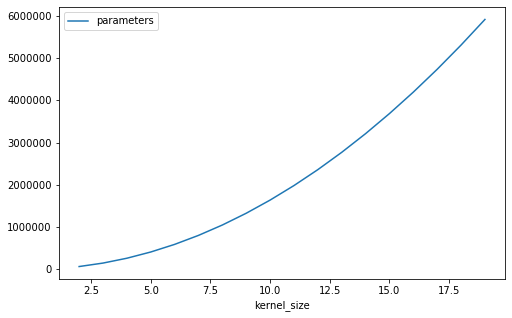

In [414]:
temp.plot(figsize= (8,5))
plt.xlabel('kernel_size')

## 2.3) (3 points)
Explain your findings regading different types of neural networks and building blocks based on your observations from 2.1 and 2.2. 

An MLP yields many more parameters than the convolutional neural net. For the conv net with 3 kernels there were 148740 parameters and yet the MLP yielded 536871940. conv has less than .1 % of the MLP. Also the bigger the kernel for a convolutional network the parameters increases at an exponential rate.   



In [415]:
148740/536871940

0.0002770493090028136

# Question 3: Literature Review: ChestX-ray8 (Total 15 points)
Read this paper:

Pranav Rajpurkar, Jeremy Irvin, et al. 
CheXNet: Radiologist-Level Pneumonia Detection on Chest X-Rays with Deep Learning https://arxiv.org/abs/1711.05225


We are interested in understanding the task, the methods that is proposed in this paper, technical aspects of the implementation, and possible future work. After you read the full article answer the following questions. Describe you answers in your own words.  

## 3.1) (2 points) 
What type of learning algorithm is used (supervised, semi-supervised or unsupervised) for the classification? What is the reason for selecting this type of learning algorithm? 

The paper uses the term "weakly-supervised classification". 

Overall, there is no existing database that has the full annotation because of the following
1. Using Mechanical Turk at scale for these images does not make sense to put the annotation in the hands of non-medical professionals
2. it is suspected that complete annotation of a specific area of the image would be needed. Right not detail to that extent isn't viable. 
3. The medical image diagnosis questions does not apply to the already available ImageNet pre-trained deep CNN models


Since there is no database, they had to construct one with NLP and extrapolate some of the learnings and continue with supervised classification methods


import excerts from the article: 

"Deep neural network representations further make the joint language and vision
learning tasks more feasible to solve, in image captioning
[47, 23, 32, 46, 22], visual question answering [2, 45, 49, 53]
and knowledge-guided transfer learning [4, 33], and so
on. "


". The main limitation is that all proposed methods are evaluated on some small-to-middle scale
problems of (at most) several hundred patients. It remains
unclear how well the current deep learning techniques will
scale up to tens of thousands of patient studies."


" Region-level ImageNet pre-trained convolutional neural networks (CNN) based detectors are used
to parse an input image and output a list of attributes or
“visually-grounded high-level concepts”"

"Fully dense annotation of
region-level bounding boxes (for grounding the pathological findings) would normally be needed in computer vision
datasets [32, 53, 24] but may be completely nonviable for
the time being. Consequently, we formulate and verify a
weakly-supervised multi-label image classification and disease localization framework to address this difficulty"

"Deep Convolutional Neural
Network (DCNN) architectures for weakly-supervised object localization, by considering large image capacity, various multi-label CNN losses and different pooling strategies.


## 3.2) (3 points)
What type of convolutional neural network architectures were used in the paper? How does transfer learning from these architectures achieved?

The paper leverages successful models previously built including: AlexNet, GoogLeNet, VGGNet, and ResNext

The transistion layer is used after each of the pretrained models to get the data into one commmon dimension

The paper mentions three different kinds of pooling used in the model:  max pooling, average pooling, and Log-Sum-Exp (LSE) pooling 


Transfer learning is used in the bounding boxs aka the annotations that are provided in detail on the images. instead of relying on those to be created they generated their own with a heat map and normalization and thresholding

## 3.3) (2 points)
What is the loss function? 

The loss function is calcluated over 8 dimensions, one for each classification. They use both a standard CEL (Cross entropy loss) and a weighted CEL. The weighted loss function was created by the group for this special case to accomodate the unbalanced cases


## 3.4) (3 points)

Was the learning rate used changed during the training? Explain the situations where changing the learning rate is a good idea?

They likely changes the learning rate between the pretrained architectures,  as they used the following calcluation to limit GPU memory needed: batch size × iter size = 80 

by this definition the iter_size would change depending upon the batch size and which architecture is used. 


"it is necessary to reduce the image batch size to load
the entire model and keep activations in GPU while we increase the iter size to accumulate the gradients for more iterations."



Having a smaller learning rate may make the model more optimal, but also may make it slower to compute. A larger learning rate has the opposite effect. 

## 3.5) (3 points)

What are the evaluation metrics used for model comparison in classification? Explain why those metrics were chosen?

They evaluate the AUCs of ROC curves, as well as accuracy and average false positives for each of these demiensions.

AUC and accurary is a very common and helpful as it encompasses many aspects of evlauting classifcations (recall and sensitivity). Also the specific use case of this classificatiion task leads one to determine that the false posisitives is an import evaluation. This is because the use case is not diagnosing patients that aren't sick. 



## 3.6) (2 points)
Did the authors do any normalization to the data before feeding them to the model? If so, What's the purpose of doing so?

The normalization done on the model can be seen in the natural language processing of the radiology reports. 


On the images themselves the files are resized to 1024×1024


# Question 4: Deep CNN design for disease classification (Total 45 points)

In this part of the howework, we will focus on classifiying the lung disease using chest x-ray dataset provided by NIH (https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community). You should be familiar with the dataset after answering Question 3.

You need to use HPC for training part of this question, as your computer's CPU will not be fast enough to compute learning iterations. In case you use HPC, please have your code/scripts uploaded under the questions and provide the required plots and tables there as well. Data is available in HPC under /beegfs/ga4493/data/HW2 folder. We are interested in classifying pneumothorax, cardiomegaly and infiltration cases. By saying so we have 3 classes that we want to identify by modelling a deep CNN.

First, you need to work on Data_Entry_2017.csv file to identify cases/images that has infiltration, pneumothorax, and cardiomegaly. This file can be downloaded from https://nihcc.app.box.com/v/ChestXray-NIHCC

## 4.1) Train, Test, and Validation Sets (2 points)
Write a script to read data from Data_Entry_2017.csv and process to obtain 3 sets (train, validation and test). By using 'Finding Labels' column, define a class that each image belongs to, in total you can define 3 classes:
- 0 cardiomegaly
- 1 pneumothorax
- 2 infiltration

Generate a train, validation and test set by splitting the whole dataset containing specific classes (0, 1, and 2)  by 70%, 10% and 20%, respectively. Test set will not be used during modelling but it will be used to test your model's accuracy. Make sure you have similar percentages of different cases in each subset. Provide statistics of the number of classess in your subsets. (you do not need to think about splitting the sets based on subjects for this homework. In general, we do not want images from the same subject to appear in both train and test sets!!) 

Write a .csv files defining the samples in your train, validation and test set with names: train.csv, validation.csv, and test.csv. Submit these files with your homework. 

In [416]:
de2017 = pd.read_csv('Data_Entry_2017.csv')

In [418]:
de2017.head(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN
9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,0.143,NaN


In [419]:
classes = ['cardiomegaly', 'pneumothorax', 'infiltration']

In [423]:
classes[0] in de2017['Finding Labels'][1].lower()

True

In [425]:
#define classes
for class_name in classes:
    de2017[class_name] = de2017['Finding Labels'].apply(lambda x: 1 if class_name in x.lower() else 0)

In [435]:
de2017['multicheck'] = de2017[classes].sum(axis=1)

In [441]:
de2017 = de2017[de2017['multicheck'] < 2]

In [436]:
de2017.dropna()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,cardiomegaly,pneumothorax,infiltration,multicheck


In [439]:
de2017.drop('Unnamed: 11', axis=1, inplace=True)

In [434]:
temp.shape

(112120, 1)

In [442]:
de2017.shape

(110570, 15)

In [443]:
de2017.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],cardiomegaly,pneumothorax,infiltration,multicheck
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,1,0,0,1
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,1,0,0,1
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,1,0,0,1
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,0,0,0,0


In [456]:
de2017['Class'] = 0

/Users/sfalk/miniconda3/envs/pytorch_p37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [457]:
de2017.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],cardiomegaly,pneumothorax,infiltration,multicheck,Class
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,1,0,0,1,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,1,0,0,1,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,1,0,0,1,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,0,0,0,0,0


In [444]:
class_dict = {'cardiomegaly':0, 'pneumothorax':1, 'infiltration':2}

In [ ]:
# https://stackoverflow.com/questions/19226488/change-one-value-based-on-another-value-in-pandas

In [459]:
for k,v in class_dict.items():
    de2017.loc[de2017[k] == 1, 'Class'] = v

/Users/sfalk/miniconda3/envs/pytorch_p37/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [466]:
# remove remaining records
de2017 = de2017[de2017['multicheck'] > 0]

In [476]:
de2017.shape

(24856, 16)

In [472]:
X = de2017.iloc[:,:11::-1]

In [499]:
X['class'] = y

In [500]:
X.shape

(24856, 12)

In [501]:
X.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],class
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,0
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,2
19,00000005_006.png,Infiltration,6,5,70,F,PA,2992,2991,0.143,0.143,2


In [478]:
y = de2017.iloc[:,-1]

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=666)

In [503]:
X_train.shape

(17398, 12)

In [504]:
y_train.shape

(17398,)

In [505]:
X_test.shape

(4972, 12)

In [506]:
y_test.shape

(4972,)

In [507]:
X_val.shape

(2486, 12)

In [508]:
y_val.shape

(2486,)

In [509]:
y_train.value_counts()

2    12830
1     3069
0     1499
Name: Class, dtype: int64

In [510]:
y_train.value_counts(normalize=True)

2    0.737441
1    0.176400
0    0.086159
Name: Class, dtype: float64

In [511]:
y_val.value_counts(normalize=True)

2    0.754224
1    0.158488
0    0.087289
Name: Class, dtype: float64

In [512]:
y_val.value_counts()

2    1875
1     394
0     217
Name: Class, dtype: int64

In [513]:
y_test.value_counts()

2    3672
1     860
0     440
Name: Class, dtype: int64

In [514]:
y_test.value_counts(normalize=True)

2    0.738536
1    0.172969
0    0.088496
Name: Class, dtype: float64

In [ ]:
#even percent of each class

In [515]:
X_train.to_csv('train.csv', index=False)
X_val.to_csv('validation.csv', index=False)
X_test.to_csv('test.csv', index=False)

## 4.2) Data preparation before training
From here on, you will use HW2_trainSet.csv, HW2_testSet.csv and HW2_validationSet.csv provided under github repo for defining train, test and validation set samples instead of the csv files you generate on Question 4.1.


There are multiple ways of using images as an input during training or validation. Here, you will use torch Dataset class  (http://pytorch.org/tutorials/beginner/data_loading_tutorial.html). We provided the dataloader code below. Please explain what does following lines of code achieves in the data loader and propose alternatives.

In [527]:
df_test = pd.read_csv('HW2_testSet.csv')
df_train = pd.read_csv('HW2_trainSet.csv')
df_val = pd.read_csv('HW2_validationSet.csv')

In [525]:
df_test.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Class
0,00015420_003.png,Pneumothorax,3,15420,45,M,PA,2992,2991,0.143,0.143,1
1,00016587_005.png,Pneumothorax,5,16587,48,F,PA,2568,2991,0.143,0.143,1
2,00029909_000.png,Pneumothorax,0,29909,73,M,AP,3056,2544,0.139,0.139,1
3,00012288_000.png,Cardiomegaly,0,12288,65,F,PA,2990,2991,0.143,0.143,0
4,00026278_001.png,Pneumothorax,1,26278,50,F,PA,2402,2489,0.143,0.143,1


In [526]:
df_train.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Class
0,00028871_001.png,Cardiomegaly,1,28871,42,M,AP,3056,2544,0.139,0.139,0
1,00028208_023.png,Pneumothorax,23,28208,64,M,AP,3056,2544,0.139,0.139,1
2,00001583_005.png,Pneumothorax,5,1583,16,M,PA,2602,2557,0.143,0.143,1
3,00018921_060.png,Pneumothorax,60,18921,42,F,PA,2576,2519,0.143,0.143,1
4,00023313_009.png,Pneumothorax,9,23313,50,M,PA,2992,2991,0.143,0.143,1


In [528]:
df_val.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Class
0,00005038_000.png,Cardiomegaly,0,5038,12,F,PA,2192,2194,0.143,0.143,0
1,00010967_001.png,Pneumothorax,1,10967,69,M,PA,2802,2991,0.143,0.143,1
2,00006624_003.png,Cardiomegaly,3,6624,56,F,PA,2442,2991,0.143,0.143,0
3,00005365_008.png,Pneumothorax,8,5365,13,F,AP,2500,2048,0.171,0.171,1
4,00013062_003.png,Cardiomegaly,3,13062,60,F,PA,2992,2991,0.143,0.143,0


### 4.2.a) (2 points) 

image = io.imread(img_name,as_gray=True)

read in the image to object "image" from path img_name. Use grayscale for the image. 

Possible to read in as RGB, but not applicable here

You can also read an entire collection in at once w/ imread_collection

### 4.2.b) (2 points) 

image = (image - image.mean()) / image.std()

normalize the image with standard normalization procedures

using equalize could be an efficient way to normalize as well. Could occur globally or locally

Global equalize 
img_rescale = exposure.equalize_hist(img)

In [523]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from skimage import io
import torch
from skimage import color

class ChestXrayDataset(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.data_frame.iloc[idx, 0])

        image = io.imread(img_name,as_gray=True)
        
        image = (image - image.mean()) / image.std()
            
        image_class = self.data_frame.iloc[idx, -1]

        sample = {'x': image[None,:], 'y': image_class}

        if self.transform:
            sample = self.transform(sample)

        return sample

## 4.3) CNN model definition (6 points)
Since now we can import images for model training, next step is to define a CNN model that you will use to train disease classification task. Any model requires us to select model parameters like how many layers, what is the kernel size, how many feature maps and so on. The number of possible models is infinite, but we need to make some design choices to start.  Lets design a CNN model with 3 convolutional layers, 3 residual units (similar to Figure 2 of https://arxiv.org/pdf/1512.03385.pdf) and a fully connected (FC) layer followed by a classification layer. Lets use 

-  3x3 convolution kernels (stride 1 in resnet units and stride 2 in convolutional layers)
-  ReLU for an activation function
-  max pooling with kernel 2x2 and stride 2 only after the convolutional layers. 

Define the number of feature maps in hidden layers as: 16, 16, 16, 32, 32, 32, 64, 64, 64, 128 (1st layer, ..., 10th layer). 

Input --> Convolution1 --> ResNetBlock1 --> Convolution2 --> ResNetBlock2 --> Convolution3 --> ResNetBlock3 --> FC --> Classification Layer


Write a class which specifies this network details. 

In [ ]:
class Conv_model(nn.Module):
    def __init__(self, kernel_size = 3):
        super(Conv_model,self).__init__()
        self.conv1 = nn.Conv2d(1,16,kernel_size, stride = 2)
        self.relu1 = nn.ReLU()
        
        self.conv2 = nn.Conv2d(16,32,kernel_size, stride = 2)
        self.relu2 = nn.ReLU()
        
        self.conv3 = nn.Conv2d(32,64,kernel_size, padding = 1, stride = 3)
        self.relu3 = nn.ReLU()
        
        self.conv4 = nn.Conv2d(64,128,kernel_size, padding = 1, stride = 3)
        self.relu4 = nn.ReLU()
        
        self.conv5 = nn.Conv2d(128,256,kernel_size)
        self.relu5 = nn.ReLU()
        
        self.avg = nn.AdaptiveAvgPool2d(2,2)
        self.linear = nn.Linear(256, 2)
        
    def forward(self,x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.relu3(self.conv3(x))
        x = self.relu4(self.conv4(x))
        x = self.relu5(self.conv5(x))
        x = self.avg(x)
        x = self.linear(x.view(-1,256))
    
        return x

## 4.4) (2 points)
How many learnable parameters of this model has? How many learnable parameters we would have if we replace the fully connected layer with global average pooling layer (Take a look at Section 3.2 of https://arxiv.org/pdf/1312.4400.pdf)?  

## 4.5) Loss function and optimizer (2 points)
Define an appropriate loss criterion and an optimizer using pytorch. What type of loss function is applicable to our classification problem? Explain your choice of a loss function.  For an optimizer lets use Adam for now.

_Some background:_ In network architecture design, we want to have an architecture that has enough capacity to learn. We can achieve this by using large number of feature maps and/or many more connections and activation nodes. However, having a large number of learnable parameters can easily result in overfitting. To mitigate overfitting, we can keep the number of learnable parameters of the network small either using shallow networks or few feature maps. This approach results in underfitting that model can neither model the training data nor generalize to new data. Ideally, we want to select a model at the sweet spot between underfitting and overfitting. It is hard to find the exact sweet spot. 

We first need to make sure we have enough capacity to learn, without a capacity we will underfit. Here, you will need to check if designed model in 4.3. can learn or not. Since we do not need to check the generalization capacity (overfitting is OK for now since it shows learning is possible), it is a great strategy to use a subset of training samples. Also, using a subset of samples is helpful for debugging!!!

## 4.6) Train the network on a subset (8 points)
Lets use a script to take random samples from train set (HW2_trainSet.csv), lets name this set as HW2_randomTrainSet. Choose random samples from validation set (HW2_validationSet.csv), lets name this set as HW2_randomValidationSet. You used downsampling of images from 1024x1024 size to 64x64 in the Lab 4. This was fine for learning purpose but it will significantly reduce the infomation content of the images which is important especially in medicine. In this Homework, you MUST use original images of size 1024x1024 as the network input. 

In [ ]:
# get samples from HW2_trainSet.csv
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('HW2_trainSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomTrainSet.csv',index=False)

df = pd.read_csv('HW2_validationSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomValidationSet.csv',index=False)

Use the random samples generated and write a script to train your network. Using the script train your network using your choice of weight initialization strategy. In case you need to define other hyperparameters choose them empirically, for example batch size. Plot average loss on your random sample set per epoch. (Stop the training after at most ~50 epochs) 

## 4.7) Analysis of training using a CNN model(2 points)
Describe your findings. Can your network learn from small subset of random samples? Does CNN model have enough capacity to learn with your choice of emprical hyperparameters?
-  If yes, how will average loss plot will change if you multiply the learning rate by 10?
-  If no, how can you increase the model capacity? Increase your model capacity and train again until you find a model with enough capacity. If the capacity increase is not sufficient to learn, think about empirical parameters you choose in designing your network and make some changes on your selection. Describe what type of changes you made to your original network and how can you manage this model to learn.

## 4.8) Train the network on the whole dataset (6 points)
After question 4.7., you should have a network which has enough capacity to learn and you were able to debug your training code so that it is now ready to be trained on the whole dataset. Train your network on the whole train set (HW2_trainSet.csv) and check the validation loss on the whole validation set (HW2_validationSet.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

## 4.9) Experiments with Resnet18 (13 Points)

Let's use Resnet18 on our dataset and see how it performs. We can import the standard architectures directly using PyTorch's torchvison.models module. Refer to https://pytorch.org/docs/stable/torchvision/models.html to see all available models in PyTorch. You'll later, in this course, learn about a convenient and useful concept known as Transfer Learning. For now, we will  use the Resnet18 and train the architecture from scratch without any pre-training. Here is the link for the ResNet paper: https://arxiv.org/pdf/1512.03385.pdf 

### 4.9.1) (3 Points)
What is the reason of using 1x1 convolutions before 3x3 convolutions in the resnet architecture?

### 4.9.2) Train the ResNet18 on the whole dataset (10 points)

We provide a new dataset class and a few additional transformations to the data for this new architecture. We have a new dataset class as ResNet18 architectures expect 3 channels in their primary input and other reasons which you'll later come to know - after the lecture on transfer learning. Nevertheless, for our case, we use them to reduce the required GPU usage as the Resnet18 architecture is significantly complex and GPU memory-intensive architecture than the CNN implemented above.

In [ ]:
from torchvision import transforms
# torchvision models are trained on input images normalized to [0 1] range .ToPILImage() function achives this
# additional normalization is required see: http://pytorch.org/docs/master/torchvision/models.html

train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomResizedCrop(896),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

validation_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.CenterCrop(896),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

class ChestXrayDataset_ResNet(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.data_frame.iloc[idx, 0])
        
        image = io.imread(img_name)
        if len(image.shape) > 2 and image.shape[2] == 4:
            image = image[:,:,0]
            
        image=np.repeat(image[None,...],3,axis=0)
            
        image_class = self.data_frame.iloc[idx, -1]

        if self.transform:
            image = self.transform(image)
            
        sample = {'x': image, 'y': image_class}

        return sample

### 4.9.2.a) Architecture modification (6 points) 
In this question you need to develop a CNN model based on Resnet18 architecture. Please import the original ResNet18 model from PyTorch models (You can also implement this model by your own using the resnet paper). Modify the architecture so that the model will work with full size 1024x1024 image inputs and 3 classes of our interest:
- 0 cardiomegaly
- 1 pneumothorax
- 2 infiltration

Make sure the model you developed uses random weights!

### 4.9.2.b)Train the network on the whole dataset (4 points)
Similar to section 4.7. train the model you developed in section 4.9.2.a on the whole train set (HW2_trainSet.csv) and check the validation loss on the whole validation set (HW2_validationSet.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

# 5) Analysis of the results from two networks trained on the full dataset (Total 5 points + Bonus Question Maximum 5 points)
Use the validation loss to choose models from Q4.8 (model1) and Q4.9 (model2) (These models are trained on the full dataset and they learned from train data and generalized well to the validation set). 

## 5.1) Model selection by performance on test set (5 Points)
Using these models, plot confusion matrix and ROC curve for the disease classifier on the test set (HW2_TestSet.csv). Report AUC for this CNN model as the performance metric. You will have two confusion matrices and two ROC curves to compare model1 and model2

In [ ]:
# This is the place we predict the disease from a model trained, output for this function is 
#the target values and probabilty of each image having a disease 

# Example of how to plot ROC curves
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

# Example of how to calculate confusion matrix
# https://www.kaggle.com/grfiv4/plot-a-confusion-matrix



## 5.2) Understanding the network ( Bonus Question maximum 5 points)

Using the best performing model (choose the model using the analysis you performed on Q5.1), we will figure out where our network gathers infomation to decide the class for the image. One way of doing this is to occlude parts of the image and run through your network. By changing the location of the ocluded region we can visualize the probability of image being in one class as a 2-dimensional heat map. Using the best performing model, provide the heat map of the following images: HW2_visualize.csv. Do the heap map and bounding box for pathologies provide similar information? Describe your findings.
Reference: https://arxiv.org/pdf/1311.2901.pdf

In [ ]:
# You can use the code from: https://github.com/thesemicolonguy/convisualize_nb/blob/master/cnn-visualize.ipynb 
# with minor modifications
